## Question-1

Create a file “people.txt” with the following data: ied 3

i) Read the data from the file “people.txt”.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("people.txt")
df

Age agegroup  height   status  yearmarried
0   21    adult     6.0   single           -1
1    2    child     3.0  married            0
2   18    adult     5.7  married           20
3  221  elderly     5.0  widowed            2
4   34    child    -7.0  married            3

In [8]:
df.describe()

Age   height  yearmarried
count    5.000000  5.00000     5.000000
mean    59.200000  2.54000     4.800000
std     91.163041  5.45967     8.642916
min      2.000000 -7.00000    -1.000000
25%     18.000000  3.00000     0.000000
50%     21.000000  5.00000     2.000000
75%     34.000000  5.70000     3.000000
max    221.000000  6.00000    20.000000

ii) Create a ruleset E that contain rules to check for the following conditions: 
1. The age should be in the range 0-150. 
2. The age should be greater than years married. 
3. The status should be married or single or widowed. 
4. If the age is less than 18 the age group should be child, if age is between 18 and 65 the age group should be adult, if age is more than 65 the age group should be elderly.


In [14]:
def ruleset(df):
    df['rule1']=df['Age'].apply(lambda x:True if x>=0 and x<=150 else False)
    df['rule2']=df.apply(lambda x: True if  x.Age> x.yearmarried else False,axis=1)
    df['rule3']=df['status'].apply(lambda x: True if x=='married' or x=='single' or x=='widowed' else False)
    df['rule4']=df.apply(lambda x: True if(( x.Age<18 and x.agegroup=='child') or (x.Age>=18 and x.Age<=65 and x.agegroup=='adult') 
                         or (x.Age>65 and x.agegroup=='elderly')) else False, axis=1)
    

iii) Check whether ruleset E is violated by the data in the file people.txt. 

In [15]:
ruleset(df)
df

Age agegroup  height   status  yearmarried  rule1  rule2  rule3  rule4
0   21    adult     6.0   single           -1   True   True   True   True
1    2    child     3.0  married            0   True   True   True   True
2   18    adult     5.7  married           20   True  False   True   True
3  221  elderly     5.0  widowed            2  False   True   True   True
4   34    child    -7.0  married            3   True   True   True  False

iv) Summarize the results obtained in part (iii) 

In [16]:
df_rule_followed= df.iloc[:,5:]
df_rule_followed= df_rule_followed.astype(int)

df_rule_followed

rule1  rule2  rule3  rule4
0      1      1      1      1
1      1      1      1      1
2      1      0      1      1
3      0      1      1      1
4      1      1      1      0

In [17]:
df_rule_followed.describe()

rule1     rule2  rule3     rule4
count  5.000000  5.000000    5.0  5.000000
mean   0.800000  0.800000    1.0  0.800000
std    0.447214  0.447214    0.0  0.447214
min    0.000000  0.000000    1.0  0.000000
25%    1.000000  1.000000    1.0  1.000000
50%    1.000000  1.000000    1.0  1.000000
75%    1.000000  1.000000    1.0  1.000000
max    1.000000  1.000000    1.0  1.000000

v) Visualize the results obtained in part (iii)


Text(0, 0.5, 'Number of rules violated')

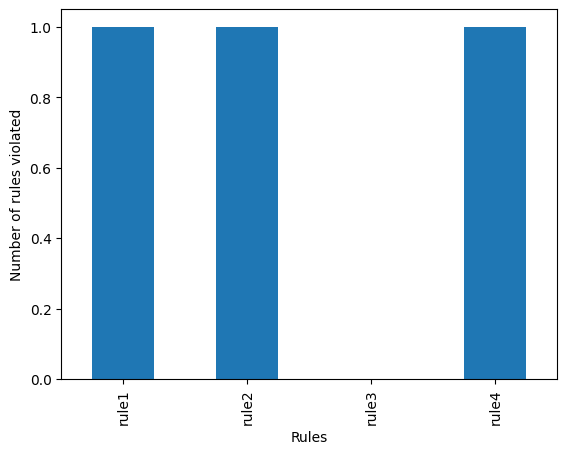

In [18]:
plt.figure()
df_rule_followed.apply(lambda x: len(x)-x.sum()).plot(kind='bar')
plt.xlabel("Rules")
plt.ylabel("Number of rules violated")

## Question : 2 
Perform the following preprocessing tasks on the dirty_iris dataset ii. 


In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Load the iris dataset from seaborn
dirty_iris = sns.load_dataset("iris")

# Make a copy of the original dataset for later comparison
original_dirty_iris = dirty_iris.copy()

dirty_iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [20]:
dirty_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [28]:
dirty_iris.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

i) Calculate the number and percentage of observations that are complete. 

In [21]:
complete_observations = dirty_iris.dropna()
num_complete_observations = len(complete_observations)
percentage_complete = (num_complete_observations / len(dirty_iris)) * 100

print("Number of complete observations:", num_complete_observations)
print("Percentage of complete observations:", percentage_complete)


Number of complete observations: 150
Percentage of complete observations: 100.0


ii) Replace all the special values in data with NA

In [22]:
dirty_iris.replace({"?": np.nan, "#": np.nan}, inplace=True)
dirty_iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

iii) Define rules and read them from a separate text file

– Species should be one of the following values: setosa, versicolor or virginica.<br>
– All measured numerical properties of an iris should be positive <br>
– The petal length of an iris is at least 2 times its petal widt.<br> 
– The sepal length of an iris cannot exceed 30 m<br>. 
– The sepals of an iris are longer than its petls. 



In [23]:
rule1= dirty_iris['species'].apply(lambda x: True if x=='setosa' or x=='versicolot' or x=='virginica' else False)
rule2= dirty_iris.iloc[:,:4].apply(lambda x: True if all(y>0 for y in x) else False, axis=1)
rule3= dirty_iris.apply(lambda x: True if x["petal_length"]>=x["petal_width"] else False , axis=1)
rule4= dirty_iris['sepal_length'].apply(lambda x: True if x<=30 else False)
rule5= dirty_iris.apply(lambda x: True if x['sepal_length']>x['petal_length'] else False, axis=1)

iv) Determine how often each rule is broken

In [24]:
dirty_iris_rule=pd.DataFrame({"Rule1":rule1,"Rule2":rule2,"Rule3":rule3,"Rule4":rule4,"Rule5":rule5})
dirty_iris_rule=dirty_iris_rule.astype(int)
dirty_iris_rule

Rule1  Rule2  Rule3  Rule4  Rule5
0        1      1      1      1      1
1        1      1      1      1      1
2        1      1      1      1      1
3        1      1      1      1      1
4        1      1      1      1      1
..     ...    ...    ...    ...    ...
145      1      1      1      1      1
146      1      1      1      1      1
147      1      1      1      1      1
148      1      1      1      1      1
149      1      1      1      1      1

[150 rows x 5 columns]

In [25]:
dirty_iris_rule['Rule1'].value_counts()

Rule1
1    100
0     50
Name: count, dtype: int64

In [26]:
dirty_iris_rule["Rule2"].value_counts()

Rule2
1    150
Name: count, dtype: int64

In [39]:
dirty_iris_rule["Rule3"].value_counts()

Rule3
1    150
Name: count, dtype: int64

In [27]:
dirty_iris_rule["Rule4"].value_counts()

Rule4
1    150
Name: count, dtype: int64

In [41]:
dirty_iris_rule["Rule5"].value_counts()

Rule5
1    150
Name: count, dtype: int64

Text(0, 0.5, 'Number of records that violate the rules')

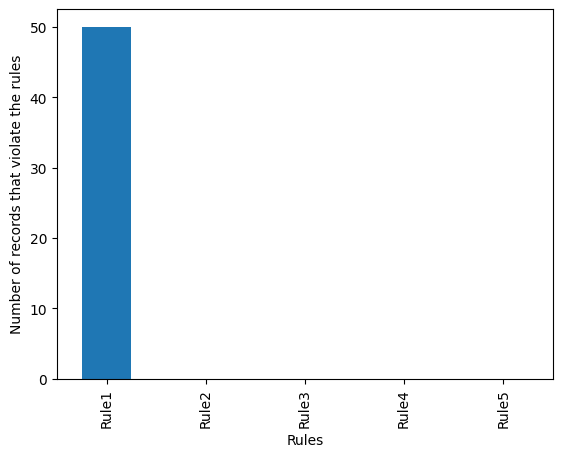

In [28]:
plt.figure()
dirty_iris_rule.apply(lambda x:len(x)-x.sum()).plot(kind='bar')
plt.xlabel("Rules")
plt.ylabel("Number of records that violate the rules")

v) Find outliers in sepal length using boxplot and boxplot.stats

<Axes: >

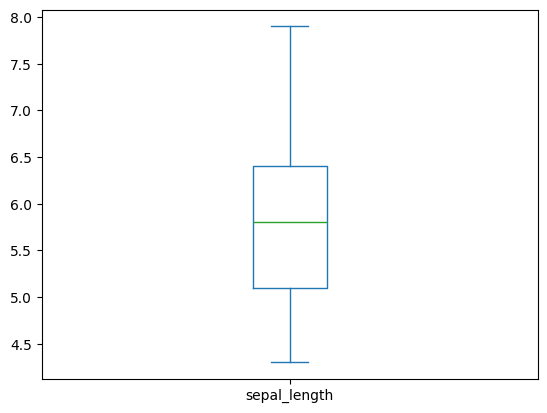

In [29]:
dirty_iris['sepal_length'].plot(kind='box')

In [30]:
quantile= dirty_iris['sepal_length'].quantile([0.0,0.25,0.50,0.75,1])
quantile

0.00    4.3
0.25    5.1
0.50    5.8
0.75    6.4
1.00    7.9
Name: sepal_length, dtype: float64

In [31]:
dirty_iris.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

## Question : 3
Load the data from the wine dataset. Check whether all attributes are standardized or not (mean is 0 and standard deviation is 1). 
If not, standardize the attributes. Do the same with Iris dataset.


In [38]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler


#### IRIS DATASET

In [32]:
iris=load_iris()
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df['Class']=iris.target
iris_df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Class  
0      0  
1      0  
2      0  
3      0  
4      0

In [58]:
len(iris_df.columns)

5

In [34]:
x=iris_df.iloc[:,:4]

print("Mean :",x.mean())
print("Standard deviation:",x.std())

Mean : sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
Standard deviation: sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64


In [35]:
scaler = StandardScaler()
scaled_iris_data= scaler.fit_transform(x)
scaled_iris_data=pd.DataFrame(scaled_iris_data, columns=x.columns)
scaled_iris_data.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444

In [36]:
print("Mean :",scaled_iris_data.mean())
print("Standard deviation:",scaled_iris_data.std())

Mean : sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64
Standard deviation: sepal length (cm)    1.00335
sepal width (cm)     1.00335
petal length (cm)    1.00335
petal width (cm)     1.00335
dtype: float64


#### WINE DATASET

In [39]:
wine=load_wine()
wine_df=pd.DataFrame(wine.data,columns=wine.feature_names)
wine_df['Class']=wine.target

wine_df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  Class  
0                          3.92   1065.0      0  
1                          3.40   1050.0      0  
2                          3.17   1185.0      0  
3                          3.45   1480.0      0  
4                          2.93    735.0      0

In [40]:
len(wine_df.columns)

14

In [41]:
x1= wine_df.iloc[:,:13]

print("Mean:",x1.mean())
print("Standard deviation:",x1.std())


Mean: alcohol                          13.000618
malic_acid                        2.336348
ash                               2.366517
alcalinity_of_ash                19.494944
magnesium                        99.741573
total_phenols                     2.295112
flavanoids                        2.029270
nonflavanoid_phenols              0.361854
proanthocyanins                   1.590899
color_intensity                   5.058090
hue                               0.957449
od280/od315_of_diluted_wines      2.611685
proline                         746.893258
dtype: float64
Standard deviation: alcohol                           0.811827
malic_acid                        1.117146
ash                               0.274344
alcalinity_of_ash                 3.339564
magnesium                        14.282484
total_phenols                     0.625851
flavanoids                        0.998859
nonflavanoid_phenols              0.124453
proanthocyanins                   0.572359
color_intensi

In [42]:
scaled_wine_data=scaler.fit_transform(x1)
scaled_wine_data=pd.DataFrame(scaled_wine_data,columns=x1.columns)
scaled_wine_data.head()

alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0         0.251717  0.362177                      1.847920  1.013009  
1        -0.293321  0.406051                      1.113449  0.965242  
2         0.269020  0.318304                      0.788587  1.395148  
3         1.186068 -0.427544                      1.184071  2.334574  
4        -0.319276  0.362177                      0.449601 -0.037874

In [43]:
print("Mean:",scaled_wine_data.mean())
print("Standard deviation:",scaled_wine_data.std())

Mean: alcohol                         7.841418e-15
malic_acid                      2.444986e-16
ash                            -4.059175e-15
alcalinity_of_ash              -7.110417e-17
magnesium                      -2.494883e-17
total_phenols                  -1.955365e-16
flavanoids                      9.443133e-16
nonflavanoid_phenols           -4.178929e-16
proanthocyanins                -1.540590e-15
color_intensity                -4.129032e-16
hue                             1.398382e-15
od280/od315_of_diluted_wines    2.126888e-15
proline                        -6.985673e-17
dtype: float64
Standard deviation: alcohol                         1.002821
malic_acid                      1.002821
ash                             1.002821
alcalinity_of_ash               1.002821
magnesium                       1.002821
total_phenols                   1.002821
flavanoids                      1.002821
nonflavanoid_phenols            1.002821
proanthocyanins                 1.002821
color

## Section 2: Data Mining Techniques
### 
Run following algorithms on 2 real datasets and use appropriate evaluation measures to compute correctness of obtained patterns: 


## Question-4
<br>Run Apriori algorithm to find frequent itemsets and association rules <br>
1.1 Use minimum support as 50% and minimum confidence as 75% <br>
1.2 Use minimum support as 60% and minimum confidence as 60 % 


In [303]:
from efficient_apriori import apriori
import pandas as pd
df=pd.read_csv("Groceries_dataset.csv")
df

Item(s)               Item 1               Item 2            Item 3  \
0           4         citrus fruit  semi-finished bread         margarine   
1           3       tropical fruit               yogurt            coffee   
2           1           whole milk                  NaN               NaN   
3           4            pip fruit               yogurt      cream cheese   
4           4     other vegetables           whole milk    condensed milk   
...       ...                  ...                  ...               ...   
9830       17              sausage              chicken              beef   
9831        1    cooking chocolate                  NaN               NaN   
9832       10              chicken         citrus fruit  other vegetables   
9833        4  semi-finished bread        bottled water              soda   
9834        5              chicken       tropical fruit  other vegetables   

                        Item 4         Item 5          Item 6  \
0                  ready soups            NaN             NaN   
1                          NaN            NaN             NaN   
2                          NaN            NaN             NaN   
3                 meat spreads            NaN             NaN   
4     long life bakery product            NaN             NaN   
...                        ...            ...             ...   
9830            hamburger meat   citrus fruit          grapes   
9831                       NaN            NaN             NaN   
9832                    butter         yogurt  frozen dessert   
9833              bottled beer            NaN             NaN   
9834                   vinegar  shopping bags             NaN   

               Item 7      Item 8  Item 9  ... Item 23 Item 24 Item 25  \
0                 NaN         NaN     NaN  ...     NaN     NaN     NaN   
1                 NaN         NaN     NaN  ...     NaN     NaN     NaN   
2                 NaN         NaN     NaN  ...     NaN     NaN     NaN   
3                 NaN         NaN     NaN  ...     NaN     NaN     NaN   
4                 NaN         NaN     NaN  ...     NaN     NaN     NaN   
...               ...         ...     ...  ...     ...     ...     ...   
9830  root vegetables  whole milk  butter  ...     NaN     NaN     NaN   
9831              NaN         NaN     NaN  ...     NaN     NaN     NaN   
9832    domestic eggs  rolls/buns     rum  ...     NaN     NaN     NaN   
9833              NaN         NaN     NaN  ...     NaN     NaN     NaN   
9834              NaN         NaN     NaN  ...     NaN     NaN     NaN   

     Item 26 Item 27 Item 28 Item 29 Item 30 Item 31 Item 32  
0        NaN     NaN     NaN     NaN     NaN     NaN     NaN  
1        NaN     NaN     NaN     NaN     NaN     NaN     NaN  
2        NaN     NaN     NaN     NaN     NaN     NaN     NaN  
3        NaN     NaN     NaN     NaN     NaN     NaN     NaN  
4        NaN     NaN     NaN     NaN     NaN     NaN     NaN  
...      ...     ...     ...     ...     ...     ...     ...  
9830     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
9831     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
9832     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
9833     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
9834     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[9835 rows x 33 columns]

In [304]:
df.head()

Item(s)            Item 1               Item 2          Item 3  \
0        4      citrus fruit  semi-finished bread       margarine   
1        3    tropical fruit               yogurt          coffee   
2        1        whole milk                  NaN             NaN   
3        4         pip fruit               yogurt    cream cheese   
4        4  other vegetables           whole milk  condensed milk   

                     Item 4 Item 5 Item 6 Item 7 Item 8 Item 9  ... Item 23  \
0               ready soups    NaN    NaN    NaN    NaN    NaN  ...     NaN   
1                       NaN    NaN    NaN    NaN    NaN    NaN  ...     NaN   
2                       NaN    NaN    NaN    NaN    NaN    NaN  ...     NaN   
3              meat spreads    NaN    NaN    NaN    NaN    NaN  ...     NaN   
4  long life bakery product    NaN    NaN    NaN    NaN    NaN  ...     NaN   

  Item 24 Item 25 Item 26 Item 27 Item 28 Item 29 Item 30 Item 31 Item 32  
0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
1     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
2     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
3     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
4     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[5 rows x 33 columns]

In [305]:
df.shape

(9835, 33)

In [306]:
df["Item(s)"].value_counts()

Item(s)
1     2159
2     1643
3     1299
4     1005
5      855
6      645
7      545
8      438
9      350
10     246
11     182
12     117
13      78
14      77
15      55
16      46
17      29
19      14
18      14
21      11
20       9
23       6
22       4
29       3
26       1
32       1
27       1
28       1
24       1
Name: count, dtype: int64

In [307]:
df.dropna(thresh=5, inplace=True)
df.head()

Item(s)            Item 1               Item 2          Item 3  \
0        4      citrus fruit  semi-finished bread       margarine   
3        4         pip fruit               yogurt    cream cheese   
4        4  other vegetables           whole milk  condensed milk   
5        5        whole milk               butter          yogurt   
7        5  other vegetables             UHT-milk      rolls/buns   

                     Item 4              Item 5 Item 6 Item 7 Item 8 Item 9  \
0               ready soups                 NaN    NaN    NaN    NaN    NaN   
3              meat spreads                 NaN    NaN    NaN    NaN    NaN   
4  long life bakery product                 NaN    NaN    NaN    NaN    NaN   
5                      rice    abrasive cleaner    NaN    NaN    NaN    NaN   
7              bottled beer  liquor (appetizer)    NaN    NaN    NaN    NaN   

   ... Item 23 Item 24 Item 25 Item 26 Item 27 Item 28 Item 29 Item 30  \
0  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
5  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
7  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

  Item 31 Item 32  
0     NaN     NaN  
3     NaN     NaN  
4     NaN     NaN  
5     NaN     NaN  
7     NaN     NaN  

[5 rows x 33 columns]

In [308]:
df.isnull().sum()

Item(s)       0
Item 1        0
Item 2        0
Item 3        0
Item 4        0
Item 5     1005
Item 6     1860
Item 7     2505
Item 8     3050
Item 9     3488
Item 10    3838
Item 11    4084
Item 12    4266
Item 13    4383
Item 14    4461
Item 15    4538
Item 16    4593
Item 17    4639
Item 18    4668
Item 19    4682
Item 20    4696
Item 21    4705
Item 22    4716
Item 23    4720
Item 24    4726
Item 25    4727
Item 26    4727
Item 27    4728
Item 28    4729
Item 29    4730
Item 30    4733
Item 31    4733
Item 32    4733
dtype: int64

In [309]:
df.dropna(thresh=3729, inplace=True, axis=1)
df.head()

Item(s)            Item 1               Item 2          Item 3  \
0        4      citrus fruit  semi-finished bread       margarine   
3        4         pip fruit               yogurt    cream cheese   
4        4  other vegetables           whole milk  condensed milk   
5        5        whole milk               butter          yogurt   
7        5  other vegetables             UHT-milk      rolls/buns   

                     Item 4              Item 5  
0               ready soups                 NaN  
3              meat spreads                 NaN  
4  long life bakery product                 NaN  
5                      rice    abrasive cleaner  
7              bottled beer  liquor (appetizer)

In [310]:
df.isnull().sum()

Item(s)       0
Item 1        0
Item 2        0
Item 3        0
Item 4        0
Item 5     1005
dtype: int64

In [311]:
df = df.fillna(method="ffill", limit=3)
df.isnull().sum()

C:\Users\akans\AppData\Local\Temp\ipykernel_33328\3806225086.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill", limit=3)


Item(s)     0
Item 1      0
Item 2      0
Item 3      0
Item 4      0
Item 5     14
dtype: int64

In [312]:
df = df.fillna(method="bfill", limit=3)
df.isnull().sum()

C:\Users\akans\AppData\Local\Temp\ipykernel_33328\3965922649.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="bfill", limit=3)


Item(s)    0
Item 1     0
Item 2     0
Item 3     0
Item 4     0
Item 5     0
dtype: int64

In [313]:
df.drop(["Item(s)"],axis=1, inplace=True)
df1 = df.values.tolist()
itemsets, rules = apriori(df1,min_support=0.02, min_confidence=0.05)
itemsets

{1: {('citrus fruit',): 691,
  ('margarine',): 275,
  ('pip fruit',): 609,
  ('yogurt',): 913,
  ('cream cheese',): 232,
  ('other vegetables',): 1497,
  ('whole milk',): 1792,
  ('long life bakery product',): 117,
  ('butter',): 406,
  ('UHT-milk',): 236,
  ('rolls/buns',): 886,
  ('bottled beer',): 256,
  ('tropical fruit',): 866,
  ('white bread',): 197,
  ('bottled water',): 459,
  ('chocolate',): 131,
  ('curd',): 385,
  ('sugar',): 132,
  ('fruit/vegetable juice',): 230,
  ('newspapers',): 192,
  ('processed cheese',): 98,
  ('root vegetables',): 915,
  ('sausage',): 723,
  ('soda',): 644,
  ('brown bread',): 324,
  ('canned beer',): 198,
  ('beverages',): 154,
  ('hamburger meat',): 279,
  ('pork',): 464,
  ('berries',): 283,
  ('whipped/sour cream',): 423,
  ('dessert',): 262,
  ('domestic eggs',): 355,
  ('butter milk',): 192,
  ('ham',): 227,
  ('grapes',): 183,
  ('pastry',): 410,
  ('oil',): 106,
  ('beef',): 427,
  ('ice cream',): 123,
  ('frozen vegetables',): 276,
  ('sa

In [314]:
rules

[{other vegetables} -> {beef},
 {beef} -> {other vegetables},
 {root vegetables} -> {beef},
 {beef} -> {root vegetables},
 {whole milk} -> {beef},
 {beef} -> {whole milk},
 {soda} -> {bottled water},
 {bottled water} -> {soda},
 {whole milk} -> {bottled water},
 {bottled water} -> {whole milk},
 {whole milk} -> {brown bread},
 {brown bread} -> {whole milk},
 {other vegetables} -> {butter},
 {butter} -> {other vegetables},
 {whole milk} -> {butter},
 {butter} -> {whole milk},
 {other vegetables} -> {chicken},
 {chicken} -> {other vegetables},
 {whole milk} -> {chicken},
 {chicken} -> {whole milk},
 {other vegetables} -> {citrus fruit},
 {citrus fruit} -> {other vegetables},
 {pip fruit} -> {citrus fruit},
 {citrus fruit} -> {pip fruit},
 {root vegetables} -> {citrus fruit},
 {citrus fruit} -> {root vegetables},
 {sausage} -> {citrus fruit},
 {citrus fruit} -> {sausage},
 {tropical fruit} -> {citrus fruit},
 {citrus fruit} -> {tropical fruit},
 {whole milk} -> {citrus fruit},
 {citrus fr

In [316]:
itemsets, rules = apriori(df1,min_support=0.1, min_confidence=0.2)
itemsets

{1: {('citrus fruit',): 691,
  ('pip fruit',): 609,
  ('yogurt',): 913,
  ('other vegetables',): 1497,
  ('whole milk',): 1792,
  ('rolls/buns',): 886,
  ('tropical fruit',): 866,
  ('root vegetables',): 915,
  ('sausage',): 723,
  ('soda',): 644},
 2: {('other vegetables', 'whole milk'): 577}}

In [317]:
rules

[{whole milk} -> {other vegetables}, {other vegetables} -> {whole milk}]

In [318]:
items = df.stack()

Text(0, 0.5, 'Frequency')

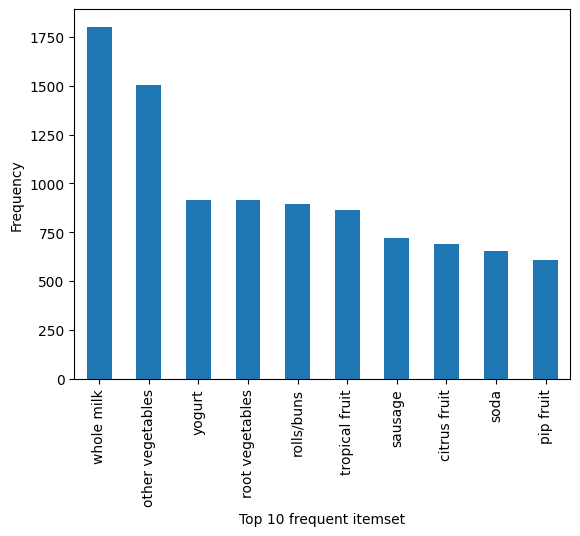

In [319]:
import matplotlib.pyplot as plt
plt.figure()
items.value_counts().head(10).plot(kind = "bar")
plt.xlabel("Top 10 frequent itemset")
plt.ylabel("Frequency")

## Question : 5

<br>Use Naive bayes, K-nearest, and Decision tree classification algorithms and build classifiers. Divide the data set into training and test set. Compare the accuracy of the different classifiers under the following situations: 


5.1 a) Training set = 75% Test set = 25% 
<br>b) Training set = 66.6% (2/3rd of total), Test set = 33.3% <br>

<br> 

52 	Training set is cho en<br> b<br>y 
i) hold out meth<br>od 
ii) Random subsampl<br>ing 
iii) Cross-Validat<br>ion. 
Compare the accuracy of the classifiers obtained. 5.3 Data is scaled to standard format.



In [321]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

## DATASET 1: IRIS DATASET

### 1. HOLDOUT METHOD
#### a) Training set = 75% Test set = 25%

In [322]:
from sklearn.datasets import load_iris
iris = load_iris()
X=iris.data
y=iris.target

X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X,y,test_size=0.25, train_size=0.75, random_state=42)
scaler = StandardScaler()
X_train_a = scaler.fit_transform(X_train_a)
X_test_a = scaler.transform(X_test_a)

### NAIVE BAYES CLASSIFIER

In [323]:
nb_model = GaussianNB()
nb_model.fit(X_train_a, y_train_a)

GaussianNB()

In [324]:
y_pred_train_a = nb_model.predict(X_train_a)
y_pred_test_a = nb_model.predict(X_test_a)

In [325]:
nb_accuracy_test = accuracy_score(y_test_a, y_pred_test_a)
print("A part\n")
print("Testing: \n",confusion_matrix(y_pred_test_a, y_test_a))
print("Testing Accuracy: ", nb_accuracy_test)
nb_accuracy_train = accuracy_score(y_train_a, y_pred_train_a)
print("Training: \n",confusion_matrix(y_pred_train_a, y_train_a))
print("Training Accuracy: ", nb_accuracy_train,"\n\n")

A part

Testing: 
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
Testing Accuracy:  1.0
Training: 
 [[35  0  0]
 [ 0 36  3]
 [ 0  3 35]]
Training Accuracy:  0.9464285714285714 




#### k-NEAREST NEIGHBOR CLASSIFIER

In [326]:
best_k=5
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_a, y_train_a)

y_pred_test_a = knn.predict(X_test_a)
y_pred_train_a = knn.predict(X_train_a)

print("A Part\n")
knn_accuracy_test_a = accuracy_score(y_test_a, y_pred_test_a)
print("Testing: \n",confusion_matrix(y_pred_test_a, y_test_a))
print("Testing Accuracy: ", knn_accuracy_test_a)
knn_accuracy_train_a = accuracy_score(y_train_a, y_pred_train_a)
print("\nTraining: \n",confusion_matrix(y_pred_train_a, y_train_a))
print("Training Accuracy: ", knn_accuracy_train_a)

A Part

Testing: 
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
Testing Accuracy:  1.0

Training: 
 [[35  0  0]
 [ 0 38  3]
 [ 0  1 35]]
Training Accuracy:  0.9642857142857143


#### DECISION TREE CLASSIFIER

In [327]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
dtree.fit(X_train_a, y_train_a)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [328]:
y_pred_test_a = dtree.predict(X_test_a)
y_pred_train_a = dtree.predict(X_train_a)
print("A Part\n")
dt_accuracy_test_a = accuracy_score(y_test_a, y_pred_test_a)
print("Testing: \n",confusion_matrix(y_pred_test_a, y_test_a))
print("Testing Accuracy: ", dt_accuracy_test_a)
dt_accuracy_train_a = accuracy_score(y_train_a, y_pred_train_a)
print("Training: \n",confusion_matrix(y_pred_train_a, y_train_a))
print("Training Accuracy: ", dt_accuracy_train_a)

A Part

Testing: 
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
Testing Accuracy:  1.0
Training: 
 [[35  0  0]
 [ 0 38  2]
 [ 0  1 36]]
Training Accuracy:  0.9732142857142857


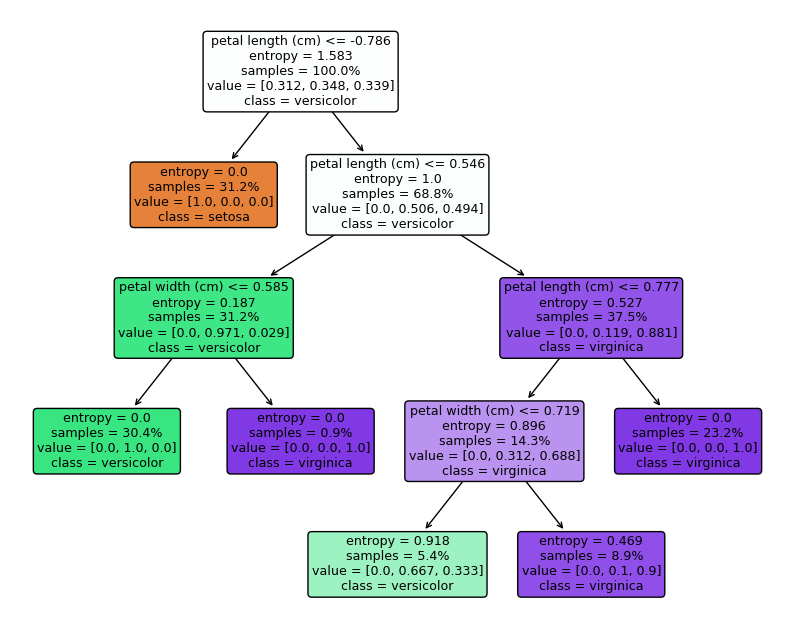

In [329]:
from sklearn.tree import plot_tree

features = iris.feature_names
classes = iris.target_names

plt.figure(figsize=(10, 8))
plot_tree(dtree,
          feature_names=features,
          class_names=classes,
          rounded=True, # Rounded node edges
          filled=True, # Adds color according to class
          proportion=True);

#### b) Training set = 66.6% (2/3rd of total), Test set = 33.3%

In [330]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X,y,test_size=0.333, random_state=42)
scaler = StandardScaler()
X_train_b = scaler.fit_transform(X_train_b)
X_test_b = scaler.transform(X_test_b)

#### NAIVE BAYES CLASSIFIER

In [331]:
nb_model_b = GaussianNB()
nb_model_b.fit(X_train_b, y_train_b)

y_pred_train_b = nb_model_b.predict(X_train_b)
y_pred_test_b = nb_model_b.predict(X_test_b)

nb_accuracy_test_b = accuracy_score(y_test_b, y_pred_test_b)
print("B part\n")
print("Testing: \n",confusion_matrix(y_pred_test_b, y_test_b))
print("Testing Accuracy: ", nb_accuracy_test_b)
nb_accuracy_train_b = accuracy_score(y_train_b, y_pred_train_b)
print("\nTraining: \n",confusion_matrix(y_pred_train_b, y_train_b))
print("Training Accuracy: ", nb_accuracy_train_b,"\n\n")

B part

Testing: 
 [[19  0  0]
 [ 0 14  1]
 [ 0  1 15]]
Testing Accuracy:  0.96

Training: 
 [[31  0  0]
 [ 0 32  2]
 [ 0  3 32]]
Training Accuracy:  0.95 




#### k-NEAREST NEIGHBOR CLASSIFIER

In [332]:
best_k=5
knn_b = KNeighborsClassifier(n_neighbors=best_k)
knn_b.fit(X_train_b, y_train_b)

y_pred_test_b = knn.predict(X_test_b)
y_pred_train_b = knn.predict(X_train_b)

print("B Part\n")
knn_accuracy_test_b = accuracy_score(y_test_b, y_pred_test_b)
print("Testing: \n",confusion_matrix(y_pred_test_b, y_test_b))
print("Testing Accuracy: ", knn_accuracy_test_b)
knn_accuracy_train_b = accuracy_score(y_train_b, y_pred_train_b)
print("\nTraining: \n",confusion_matrix(y_pred_train_b, y_train_b))
print("Training Accuracy: ", knn_accuracy_train_b)

B Part

Testing: 
 [[19  0  0]
 [ 0 15  1]
 [ 0  0 15]]
Testing Accuracy:  0.98

Training: 
 [[31  0  0]
 [ 0 34  3]
 [ 0  1 31]]
Training Accuracy:  0.96


#### DECISION TREE CLASSIFIER

In [333]:
dtree_b = DecisionTreeClassifier(criterion='entropy', max_depth=4)
dtree_b.fit(X_train_b, y_train_b)

y_pred_test_b = dtree_b.predict(X_test_b)
y_pred_train_b = dtree_b.predict(X_train_b)

print("B Part\n")
dt_accuracy_test_b = accuracy_score(y_test_b, y_pred_test_b)
print("Testing: \n",confusion_matrix(y_pred_test_b, y_test_b))
print("Testing Accuracy: ", dt_accuracy_test_b)
dt_accuracy_train_b = accuracy_score(y_train_b, y_pred_train_b)
print("Training: \n",confusion_matrix(y_pred_train_b, y_train_b))
print("Training Accuracy: ", dt_accuracy_train_b)

B Part

Testing: 
 [[19  0  0]
 [ 0 15  1]
 [ 0  0 15]]
Testing Accuracy:  0.98
Training: 
 [[31  0  0]
 [ 0 35  2]
 [ 0  0 32]]
Training Accuracy:  0.98


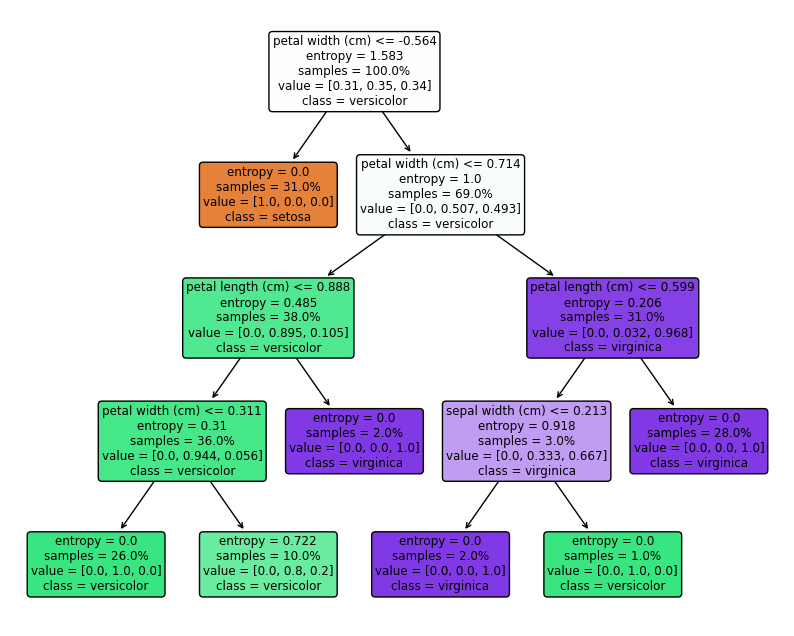

In [334]:
features = iris.feature_names
classes = iris.target_names

plt.figure(figsize=(10, 8))
plot_tree(dtree_b,
          feature_names=features,
          class_names=classes,
          rounded=True, # Rounded node edges
          filled=True, # Adds color according to class
          proportion=True);

# Comparison (Iris Dataset)
### Hold-Out

In [335]:
acc_hold_out = pd.DataFrame({
    'Decision Tree':[dt_accuracy_test_a, dt_accuracy_test_b],
    'Naive Bayes':[nb_accuracy_test,nb_accuracy_test_b],
    'knn':[knn_accuracy_test_a, knn_accuracy_test_b]
}, index=['Accuracy (train-test split A)', 'Accuracy (train-test split B)'])
acc_hold_out

Decision Tree  Naive Bayes   knn
Accuracy (train-test split A)           1.00         1.00  1.00
Accuracy (train-test split B)           0.98         0.96  0.98

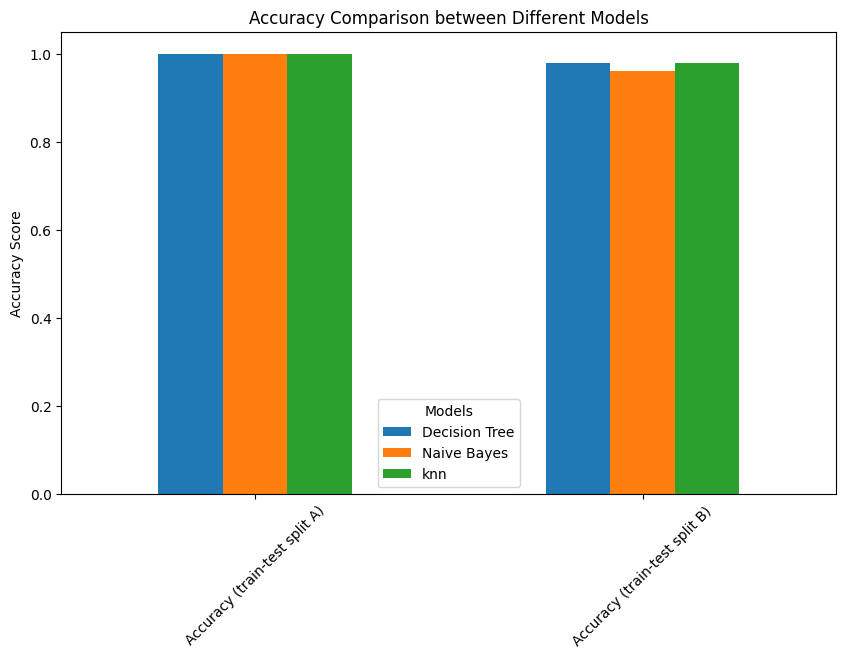

In [336]:
acc_hold_out.plot(kind='bar', figsize=(10, 6))

# Adding title and labels
plt.title('Accuracy Comparison between Different Models')
plt.xlabel('')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Displaying the plot
plt.legend(title='Models')
plt.show()

### 2. RANDOM SUBSAMPLING (Iris Dataset)

In [337]:
X = iris.data
y = iris.target

dec_acc=[]
knn_acc=[]
nb_acc=[]
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state = i+1)
        
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_test)
    dec_acc.append(accuracy_score(y_test, y_pred_dt))
        
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    knn_acc.append(accuracy_score(y_test, y_pred_knn))
        
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    y_pred_nb = nb.predict(X_test)
    nb_acc.append(accuracy_score(y_test, y_pred_nb))
    
final=[]
acc_dec = sum(dec_acc)/len(dec_acc)
acc_knn = sum(knn_acc)/len(knn_acc)
acc_nb = sum(nb_acc)/len(nb_acc)
    
final.append(acc_dec)
final.append(acc_knn)
final.append(acc_nb)

In [338]:
accuracy_a=pd.DataFrame(final, columns=['Testing Accuracy'], index=['Decision Tree', 'knn', 'naive bayes'])
accuracy_a

Testing Accuracy
Decision Tree          0.947368
knn                    0.963158
naive bayes            0.947368

## Comparison Plot
### Random Subsampling

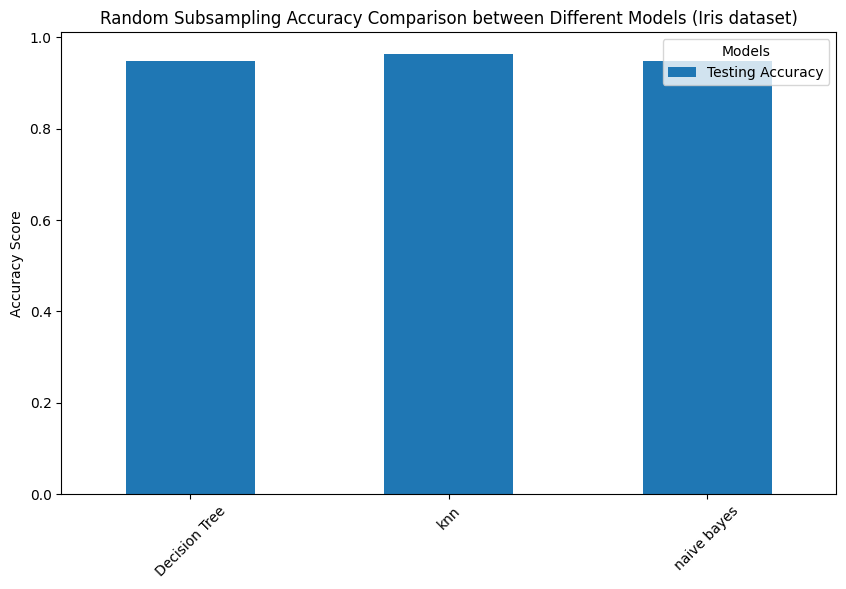

In [339]:
accuracy_a.plot(kind='bar', figsize=(10, 6))

# Adding title and labels
plt.title('Random Subsampling Accuracy Comparison between Different Models (Iris dataset)')
plt.xlabel('')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Displaying the plot
plt.legend(title='Models')
plt.show()

### 3. CROSS VALIDATION (Iris dataset)

In [340]:
from sklearn.model_selection import cross_val_score, KFold
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
X = iris.data
y= iris.target
scaler = StandardScaler()
X = scaler.fit_transform(X)
decision_tree = DecisionTreeClassifier(criterion='entropy')
naive_b = GaussianNB()
k_nearest = KNeighborsClassifier(n_neighbors=5)
cv_scores_dt = cross_val_score(decision_tree, X, y, cv=kf, scoring='accuracy')
cv_scores_nb = cross_val_score(naive_b, X, y, cv=kf, scoring='accuracy')
cv_scores_knn = cross_val_score(k_nearest, X, y, cv=kf, scoring='accuracy')
cv_metrics = pd.DataFrame({
    'Cross Validation Scores': [cv_scores_knn.mean() , cv_scores_dt.mean() , cv_scores_nb.mean()]
}, index=['KNN', 'Decision Tree', 'Naive Bayes'])
cv_metrics

Cross Validation Scores
KNN                           0.960000
Decision Tree                 0.953333
Naive Bayes                   0.960000

## Comparison Plot
### Cross Validation

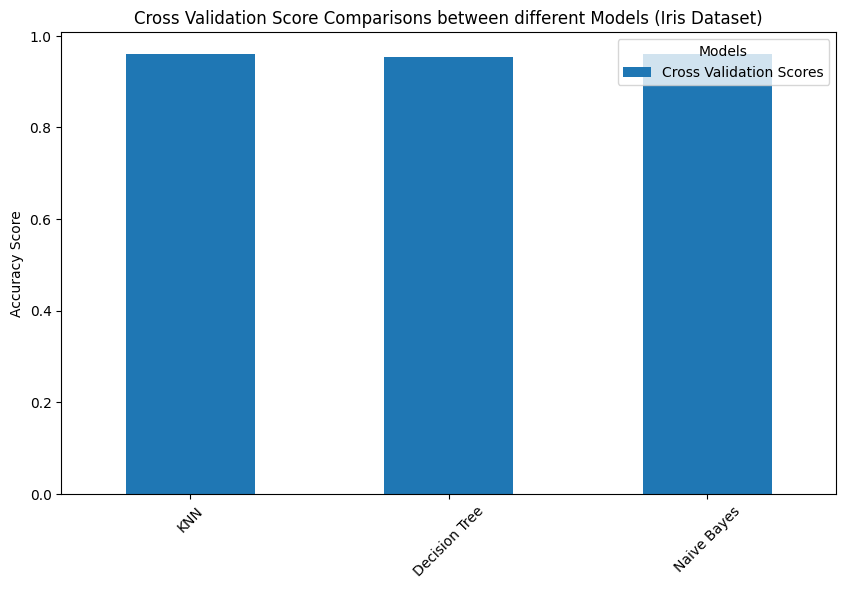

In [341]:
cv_metrics.plot(kind='bar', figsize=(10, 6))

# Adding title and labels
plt.title('Cross Validation Score Comparisons between different Models (Iris Dataset)')
plt.xlabel('')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Displaying the plot
plt.legend(title='Models')
plt.show()

## DATASET 2: BREAST CANCER DATASET

### 1. HOLDOUT METHOD
#### a) Training set = 75% Test set = 25%

In [343]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()
Xw=bc.data
yw=bc.target

X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(Xw,yw,test_size=0.25, train_size=0.75, random_state=42)
scaler = StandardScaler()
X_train_bc = scaler.fit_transform(X_train_bc)
X_test_bc = scaler.transform(X_test_bc)

### NAIVE BAYES CLASSIFIER

In [344]:
nb_model_bc = GaussianNB()
nb_model_bc.fit(X_train_bc, y_train_bc)

y_pred_train_bc = nb_model_bc.predict(X_train_bc)
y_pred_test_bc = nb_model_bc.predict(X_test_bc)

nb_accuracy_test_bc = accuracy_score(y_test_bc, y_pred_test_bc)
print("A part\n")
print("Testing: \n",confusion_matrix(y_pred_test_bc, y_test_bc))
print("Testing Accuracy: ", nb_accuracy_test_bc)
nb_accuracy_train = accuracy_score(y_train_bc, y_pred_train_bc)
print("\nTraining: \n",confusion_matrix(y_pred_train_bc, y_train_bc))
print("Training Accuracy: ", nb_accuracy_train)

A part

Testing: 
 [[51  4]
 [ 3 85]]
Testing Accuracy:  0.951048951048951

Training: 
 [[140   9]
 [ 18 259]]
Training Accuracy:  0.9366197183098591


#### k-NEAREST NEIGHBOR CLASSIFIER

In [345]:
knn_bc = KNeighborsClassifier()
knn_bc.fit(X_train_bc, y_train_bc)
y_pred_bc = knn_bc.predict(X_test_bc)
print(confusion_matrix(y_test_bc, y_pred_bc))

[[51  3]
 [ 3 86]]


In [346]:
knn_accuracy_test_bc = accuracy_score(y_test_bc, y_pred_bc)
print("A part\n")
print("Testing: \n",confusion_matrix(y_pred_test_bc, y_test_bc))
print("Testing Accuracy: ", knn_accuracy_test_bc)

A part

Testing: 
 [[51  4]
 [ 3 85]]
Testing Accuracy:  0.958041958041958


#### DECISION TREE CLASSIFIER

In [347]:
dtree_bc = DecisionTreeClassifier(criterion='entropy', max_depth=5)
dtree_bc.fit(X_train_bc, y_train_bc)

y_pred_test_bc = dtree_bc.predict(X_test_bc)
y_pred_train_bc = dtree_bc.predict(X_train_bc)

print("A Part\n")
dt_accuracy_test_bc = accuracy_score(y_test_bc, y_pred_test_bc)
print("Testing: \n",confusion_matrix(y_pred_test_bc, y_test_bc))
print("Testing Accuracy: ", dt_accuracy_test_bc)

A Part

Testing: 
 [[50  2]
 [ 4 87]]
Testing Accuracy:  0.958041958041958


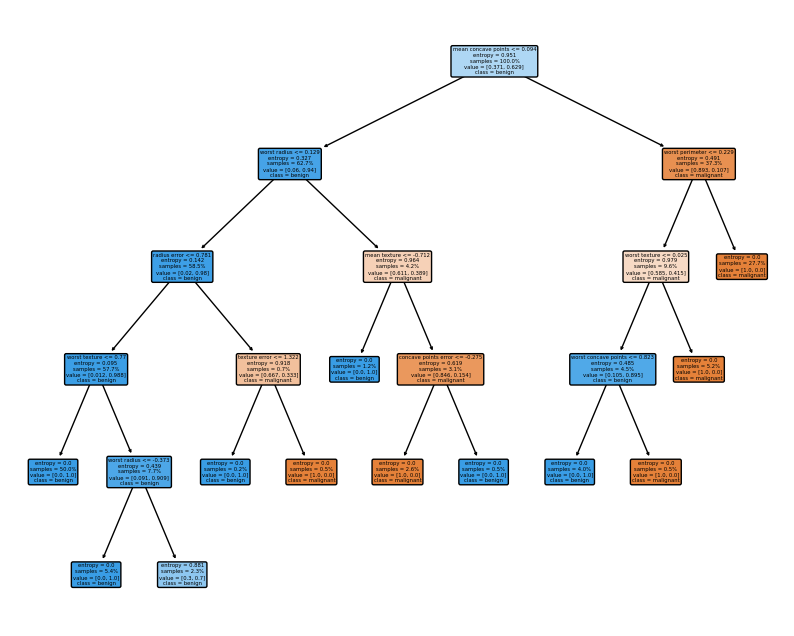

In [348]:
features = bc.feature_names
classes = bc.target_names

plt.figure(figsize=(10, 8))
plot_tree(dtree_bc,
          feature_names=features,
          class_names=classes,
          rounded=True, # Rounded node edges
          filled=True, # Adds color according to class
          proportion=True);

#### b) Training set = 66.6% Test set = 33.3%

In [349]:
bc = load_breast_cancer()
Xw=bc.data
yw=bc.target

X_train_bc_b, X_test_bc_b, y_train_bc_b, y_test_bc_b = train_test_split(Xw,yw,test_size=0.333, random_state=42)
scaler = StandardScaler()
X_train_bc_b = scaler.fit_transform(X_train_bc_b)
X_test_bc_b = scaler.transform(X_test_bc_b)

#### NAIVE BAYES CLASSIFIER

In [350]:
nb_model_bc = GaussianNB()
nb_model_bc.fit(X_train_bc_b, y_train_bc_b)

y_pred_train_bc = nb_model_bc.predict(X_train_bc_b)
y_pred_test_bc = nb_model_bc.predict(X_test_bc_b)

nb_accuracy_test_bc_b = accuracy_score(y_test_bc_b, y_pred_test_bc)
print("A part\n")
print("Testing: \n",confusion_matrix(y_pred_test_bc, y_test_bc_b))
print("Testing Accuracy: ", nb_accuracy_test_bc_b)
nb_accuracy_train = accuracy_score(y_train_bc_b, y_pred_train_bc)
print("\nTraining: \n",confusion_matrix(y_pred_train_bc, y_train_bc_b))
print("Training Accuracy: ", nb_accuracy_train)

A part

Testing: 
 [[ 62   6]
 [  6 116]]
Testing Accuracy:  0.9368421052631579

Training: 
 [[129   7]
 [ 15 228]]
Training Accuracy:  0.941952506596306


#### k-NEAREST NEIGHBOR CLASSIFIER

In [351]:
knn_bc_b = KNeighborsClassifier()
knn_bc_b.fit(X_train_bc_b, y_train_bc_b)
y_pred_bc = knn_bc.predict(X_test_bc_b)
print(confusion_matrix(y_test_bc_b, y_pred_bc))

knn_accuracy_test_bc_b = accuracy_score(y_test_bc_b, y_pred_bc)
print("A part\n")
print("Testing: \n",confusion_matrix(y_pred_test_bc, y_test_bc_b))
print("Testing Accuracy: ", knn_accuracy_test_bc_b)

[[ 64   4]
 [  2 120]]
A part

Testing: 
 [[ 62   6]
 [  6 116]]
Testing Accuracy:  0.968421052631579


#### DECISION TREE CLASSIFIER

In [352]:
dtree_bc_b = DecisionTreeClassifier(criterion='entropy', max_depth=5)
dtree_bc_b.fit(X_train_bc_b, y_train_bc_b)

y_pred_test_bc_b = dtree_bc_b.predict(X_test_bc_b)

print("A Part\n")
dt_accuracy_test_bc_b = accuracy_score(y_test_bc_b, y_pred_test_bc_b)
print("Testing: \n",confusion_matrix(y_pred_test_bc_b, y_test_bc_b))
print("Testing Accuracy: ", dt_accuracy_test_bc_b)

A Part

Testing: 
 [[ 60   2]
 [  8 120]]
Testing Accuracy:  0.9473684210526315


## Comparison between Models (Breast Cancer Dataset)
### Hold-Out Method

In [353]:
acc_hold_out_bc = pd.DataFrame({
    'Decision Tree':[dt_accuracy_test_bc, dt_accuracy_test_bc_b],
    'Naive Bayes':[nb_accuracy_test_bc,nb_accuracy_test_bc_b],
    'knn':[knn_accuracy_test_bc, knn_accuracy_test_bc_b]
}, index=['Accuracy (train-test split A)', 'Accuracy (train-test split B)'])
acc_hold_out_bc

Decision Tree  Naive Bayes       knn
Accuracy (train-test split A)       0.958042     0.951049  0.958042
Accuracy (train-test split B)       0.947368     0.936842  0.968421

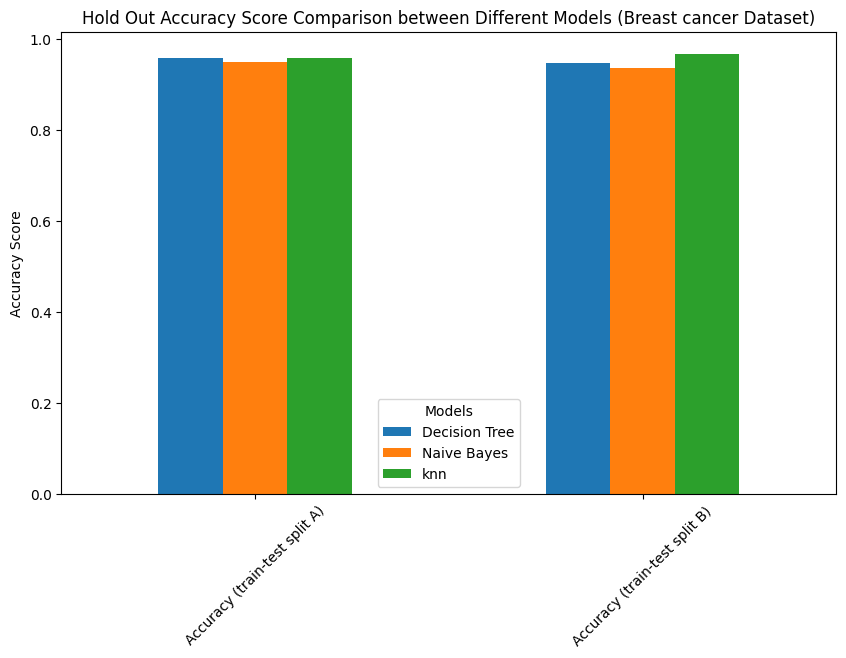

In [354]:
acc_hold_out_bc.plot(kind='bar', figsize=(10, 6))

# Adding title and labels
plt.title('Hold Out Accuracy Score Comparison between Different Models (Breast cancer Dataset)')
plt.xlabel('')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Displaying the plot
plt.legend(title='Models')
plt.show()

### 2. RANDOM SUBSAMPLING (Breast Cancer Dataset)

In [355]:
X = bc.data
y = bc.target

dec_acc=[]
knn_acc=[]
nb_acc=[]
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state = i+1)
        
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_test)
    dec_acc.append(accuracy_score(y_test, y_pred_dt))
        
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    knn_acc.append(accuracy_score(y_test, y_pred_knn))
        
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    y_pred_nb = nb.predict(X_test)
    nb_acc.append(accuracy_score(y_test, y_pred_nb))
    
final=[]
acc_dec = sum(dec_acc)/len(dec_acc)
acc_knn = sum(knn_acc)/len(knn_acc)
acc_nb = sum(nb_acc)/len(nb_acc)
    
final.append(acc_dec)
final.append(acc_knn)
final.append(acc_nb)

In [356]:
accuracy_b=pd.DataFrame(final, columns=['Testing Accuracy'], index=['Decision Tree', 'knn', 'naive bayes'])
accuracy_b

Testing Accuracy
Decision Tree          0.921678
knn                    0.930769
naive bayes            0.941958

## Comparison between Models (Breast Cancer Dataset)
### Random Subsampling

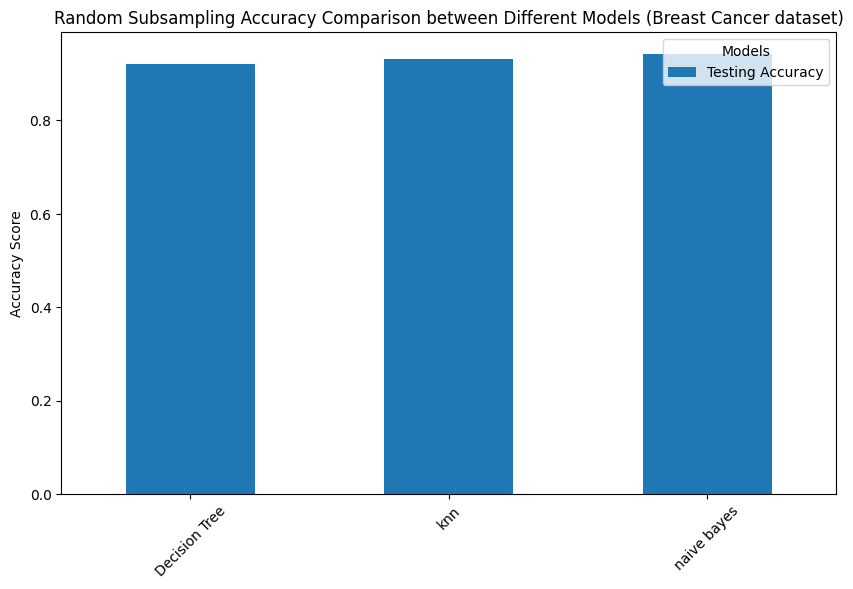

In [357]:
accuracy_b.plot(kind='bar', figsize=(10, 6))

# Adding title and labels
plt.title('Random Subsampling Accuracy Comparison between Different Models (Breast Cancer dataset)')
plt.xlabel('')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Displaying the plot
plt.legend(title='Models')
plt.show()

### 3. CROSS VALIDATION (breast cancer dataset)

In [358]:
from sklearn.model_selection import cross_val_score, KFold
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
Xbc=bc.data
ybc=bc.target
scaler = StandardScaler()
Xbc = scaler.fit_transform(X)
decision_tree_bc = DecisionTreeClassifier(criterion='entropy')
naive_bc = GaussianNB()
k_nearest_bc = KNeighborsClassifier(n_neighbors=5)
cv_scores_dt_bc = cross_val_score(decision_tree_bc, Xbc, ybc, cv=kf, scoring='accuracy')
cv_scores_nb_bc = cross_val_score(naive_bc, Xbc, ybc, cv=kf, scoring='accuracy')
cv_scores_knn_bc = cross_val_score(k_nearest_bc, Xbc, ybc, cv=kf, scoring='accuracy')
cv_metrics_bc = pd.DataFrame({
    'Cross Validation Scores': [cv_scores_knn_bc.mean() , cv_scores_dt_bc.mean() , cv_scores_nb_bc.mean()]
}, index=['KNN', 'Decision Tree', 'Naive Bayes'])
cv_metrics_bc

Cross Validation Scores
KNN                           0.959525
Decision Tree                 0.931424
Naive Bayes                   0.936718